### Testing and Evaluation on Basic Collaborative Filtering

In [6]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm

# import functions
import CF
import Metrics

In [7]:
# reads in the 100k user rating data set
u100k = pd.read_csv('u.data', sep='\t', names=['userID', 'filmID', 'rating', 'timestamp'])

# reads in the 1m user rating data set
u1m = pd.read_csv('ratings.dat', sep='::', names=['userID', 'filmID', 'rating', 'timestamp'], engine ='python')

In [11]:
f_ind = CF.t_fold_index(u100k, 10)
f = CF.t_fold(u100k, f_ind)

In [12]:
ui = CF.gen_ui_matrix(u100k, f[0])

In [16]:
sim = Metrics.gen_cos(ui, True)

18.1 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
k_range = np.arange(10,301,10)

In [4]:
cos_eval_test = CF.cross_val(u100k, 10, Metrics.gen_cos, k_range)

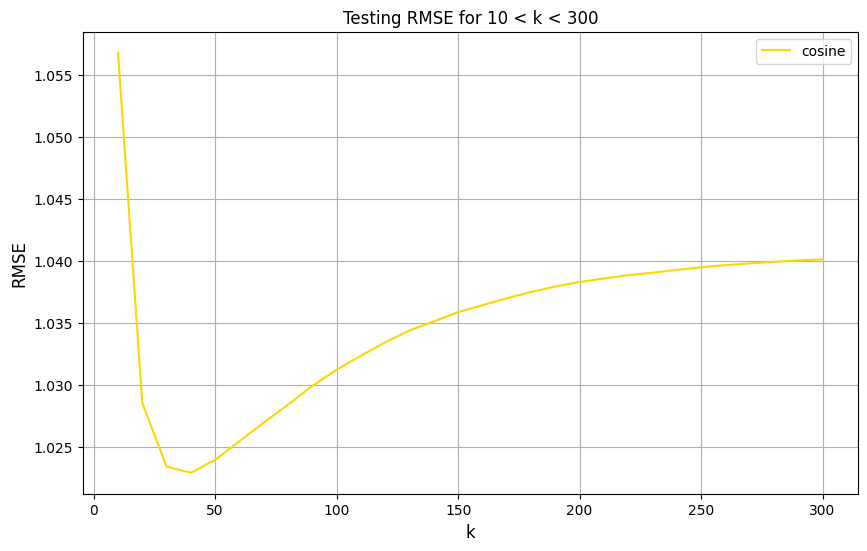

In [5]:
plt.figure(figsize=(10,6))
plt.title("Testing RMSE for 10 < k < 300", size=12)
plt.plot(k_range, cos_eval_test[0], label = 'cosine', color='gold')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('RMSE', size=12)
plt.xlabel('k', size=12)
plt.show()

In [4]:
cos_eval_test = CF.cross_val(u100k, 10, Metrics.gen_cos, k_range)
pcc_eval_test = CF.cross_val(u100k, 10, Metrics.gen_pcc, k_range)
srcc_eval_test = CF.cross_val(u100k, 10, Metrics.gen_srcc, k_range)
jacc_eval_test = CF.cross_val(u100k, 10, Metrics.gen_jacc_tree, k_range)
euc_eval_test = CF.cross_val(u100k, 10, Metrics.gen_euc, k_range)
mhat_eval_test = CF.cross_val(u100k, 10, Metrics.gen_mhat, k_range)
cheb_eval_test = CF.cross_val(u100k, 10, Metrics.gen_cheb_tree, k_range)

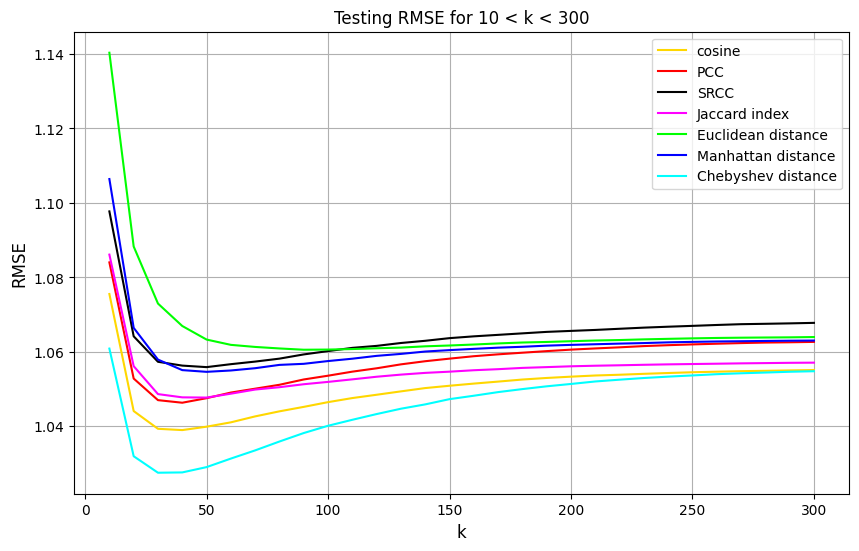

In [5]:
plt.figure(figsize=(10,6))
plt.title("Testing RMSE for 10 < k < 300", size=12)
plt.plot(k_range, cos_eval_test[0], label = 'cosine', color='gold')
plt.plot(k_range, pcc_eval_test[0], label = 'PCC', color='red')
plt.plot(k_range, srcc_eval_test[0], label = 'SRCC', color='black')
plt.plot(k_range, jacc_eval_test[0], label = 'Jaccard index', color='magenta')
plt.plot(k_range, euc_eval_test[0], label = 'Euclidean distance', color='lime')
plt.plot(k_range, mhat_eval_test[0], label = 'Manhattan distance', color='blue')
plt.plot(k_range, cheb_eval_test[0], label = 'Chebyshev distance', color='aqua')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('RMSE', size=12)
plt.xlabel('k', size=12)
plt.show()

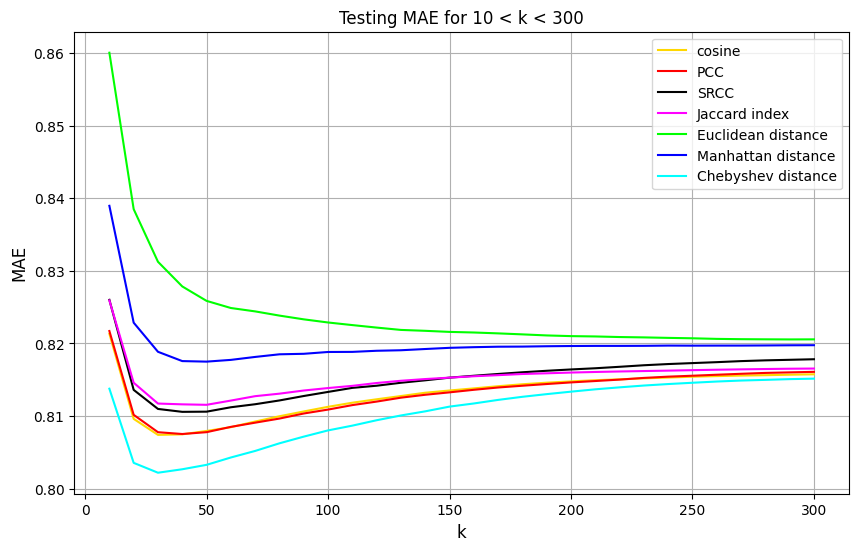

In [6]:
plt.figure(figsize=(10,6))
plt.title("Testing MAE for 10 < k < 300", size=12)
plt.plot(k_range, cos_eval_test[1], label = 'cosine', color='gold')
plt.plot(k_range, pcc_eval_test[1], label = 'PCC', color='red')
plt.plot(k_range, srcc_eval_test[1], label = 'SRCC', color='black')
plt.plot(k_range, jacc_eval_test[1], label = 'Jaccard index', color='magenta')
plt.plot(k_range, euc_eval_test[1], label = 'Euclidean distance', color='lime')
plt.plot(k_range, mhat_eval_test[1], label = 'Manhattan distance', color='blue')
plt.plot(k_range, cheb_eval_test[1], label = 'Chebyshev distance', color='aqua')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('MAE', size=12)
plt.xlabel('k', size=12)
plt.show()

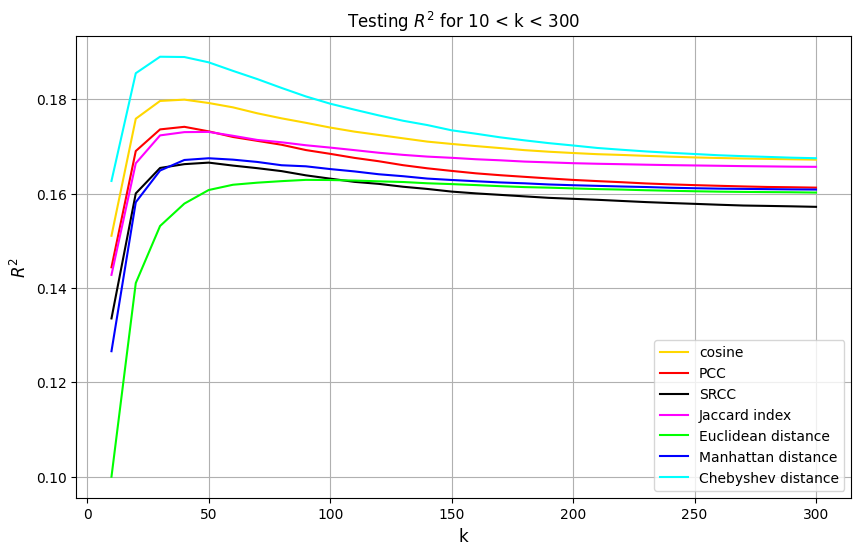

In [7]:
plt.figure(figsize=(10,6))
plt.title(r"Testing $R^2$ for 10 < k < 300", size=12)
plt.plot(k_range, cos_eval_test[2], label = 'cosine', color='gold')
plt.plot(k_range, pcc_eval_test[2], label = 'PCC', color='red')
plt.plot(k_range, srcc_eval_test[2], label = 'SRCC', color='black')
plt.plot(k_range, jacc_eval_test[2], label = 'Jaccard index', color='magenta')
plt.plot(k_range, euc_eval_test[2], label = 'Euclidean distance', color='lime')
plt.plot(k_range, mhat_eval_test[2], label = 'Manhattan distance', color='blue')
plt.plot(k_range, cheb_eval_test[2], label = 'Chebyshev distance', color='aqua')
plt.grid()
plt.legend(loc = 'lower right')
plt.ylabel(r'$R^2$', size=12)
plt.xlabel('k', size=12)
plt.show()

In [8]:
cos_best_k = CF.find_best_k(cos_eval_test, k_range)
pcc_best_k = CF.find_best_k(pcc_eval_test, k_range)
srcc_best_k = CF.find_best_k(srcc_eval_test, k_range)
jacc_best_k = CF.find_best_k(jacc_eval_test, k_range)
euc_best_k = CF.find_best_k(euc_eval_test, k_range)
mhat_best_k = CF.find_best_k(mhat_eval_test, k_range)
cheb_best_k = CF.find_best_k(cheb_eval_test, k_range)

In [9]:
for k in cos_best_k.keys():
    print('Best cosine', k, '=', cos_best_k[k][1], 'for k =', cos_best_k[k][0])

Best cosine RMSE = 1.0389949534044949 for k = 40
Best cosine MAE = 0.8073903234259149 for k = 30
Best cosine R^2 = 0.17990504706153304 for k = 40


In [10]:
for k in pcc_best_k.keys():
    print('Best PCC', k, '=', pcc_best_k[k][1], 'for k =', pcc_best_k[k][0])

Best PCC RMSE = 1.0463433389076064 for k = 40
Best PCC MAE = 0.8075116651651786 for k = 40
Best PCC R^2 = 0.17414178786798354 for k = 40


In [11]:
for k in srcc_best_k.keys():
    print('Best SRCC', k, '=', srcc_best_k[k][1], 'for k =', srcc_best_k[k][0])

Best SRCC RMSE = 1.0559052098674093 for k = 50
Best SRCC MAE = 0.8105673893220786 for k = 40
Best SRCC R^2 = 0.16655081534895805 for k = 50


In [12]:
for k in jacc_best_k.keys():
    print('Best Jaccard index', k, '=', jacc_best_k[k][1], 'for k =', jacc_best_k[k][0])

Best Jaccard index RMSE = 1.0477263515321344 for k = 50
Best Jaccard index MAE = 0.811536293052708 for k = 50
Best Jaccard index R^2 = 0.17306410188375265 for k = 50


In [13]:
for k in euc_best_k.keys():
    print('Best Euclidean', k, '=', euc_best_k[k][1], 'for k =', euc_best_k[k][0])

Best Euclidean RMSE = 1.0605762691315153 for k = 90
Best Euclidean MAE = 0.8205483886627336 for k = 290
Best Euclidean R^2 = 0.16289554860300792 for k = 90


In [14]:
for k in mhat_best_k.keys():
    print('Best Manhattan', k, '=', mhat_best_k[k][1], 'for k =', mhat_best_k[k][0])

Best Manhattan RMSE = 1.054640329539005 for k = 50
Best Manhattan MAE = 0.8174885603578556 for k = 50
Best Manhattan R^2 = 0.16747695288494754 for k = 50


In [15]:
for k in cheb_best_k.keys():
    print('Best Chebyshev', k, '=', cheb_best_k[k][1], 'for k =', cheb_best_k[k][0])

Best Chebyshev RMSE = 1.0275434737764944 for k = 30
Best Chebyshev MAE = 0.8021757334392049 for k = 30
Best Chebyshev R^2 = 0.18900231706221773 for k = 30
